In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Train_Final.csv")
test = pd.read_csv("/content/drive/MyDrive/ES_Twitch_Dataset/Test_Final.csv")

In [4]:
x_train = train.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_train = train['Target']

In [5]:
x_test = test.drop({'Target', 'Unnamed: 0'}, axis = 1)
y_test = test['Target']

In [7]:
mlp = MLPClassifier(random_state = 123)

params = { "hidden_layer_sizes": [(100,), (200,), (300,)],
           "activation": ['identity', 'logistic', 'tanh', 'relu'],
           "solver": ['lbfgs', 'sgd', 'adam'],
           "alpha": [0.0001, 0.001, 0.01],
           "learning_rate": ['constant', 'invscaling', 'adaptive']
         }

model = RandomizedSearchCV(mlp, params, random_state=123, n_jobs = 1, n_iter = 15, cv = 5, scoring="roc_auc")

## Entreno el modelo

In [ ]:
model.fit(x_train, y_train)

Mejores hiperparametros encontrados

In [9]:
best_params = model.best_estimator_.get_params()
best_params

{'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 123,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Scores

Calculo el score para el set de entrenamiento

In [10]:
roc_auc_score(y_train, model.predict_proba(x_train)[:,1])

0.9177473064425068

Calculo el score para el set de test:

In [11]:
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

0.814309286311185

## Matriz de confusión

Text(0.5, 1.0, 'Confusion matrix')

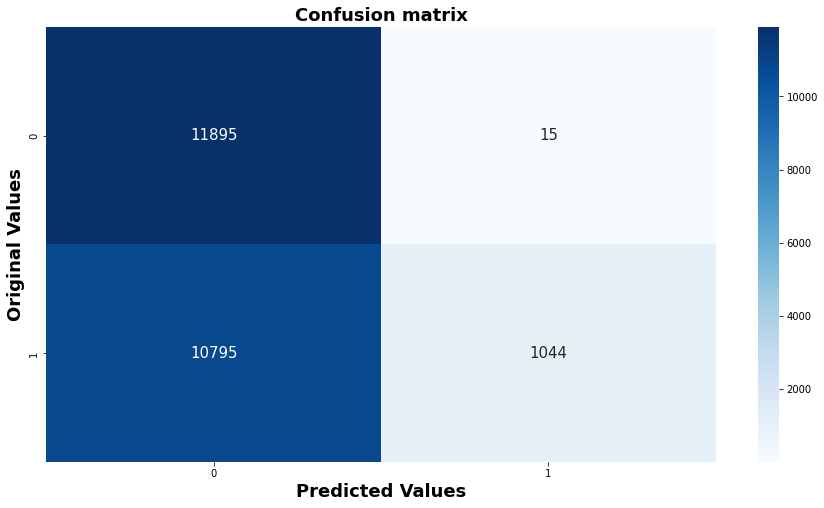

In [12]:
C = confusion_matrix(y_test, model.predict(x_test))  
plt.figure(figsize=(15,8))
labels = [0,1]
sns.heatmap(C, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels, annot_kws={'size': 15})
plt.xlabel('Predicted Values', fontsize=18, fontweight='bold')
plt.ylabel('Original Values', fontsize=18, fontweight='bold')
plt.title("Confusion matrix", fontsize = 18, fontweight='bold')

## Features mas importantes